In [1]:
# Assignment 1 for Professor Wang's PM Data Science class
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1. Download and load the titanic data set
titanic_data = pd.read_csv("../titanic_data.csv", index_col='PassengerId')

In [3]:
# 2. Use pandas to print out the first few rows of the data set
titanic_data.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [4]:
# 3 Use pandas to identify the different feature types
titanic_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
# 4. Which ones are numerical and categorical
cols = titanic_data.columns

numerical_cols = titanic_data._get_numeric_data().columns

categorical_cols = list(set(cols) - set(numerical_cols))

print("Numerical:",list(numerical_cols.values.astype(str)))
print("Categorical:",categorical_cols)

Numerical: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical: ['Name', 'Sex', 'Embarked', 'Ticket', 'Cabin']


In [6]:
# 5. Print summary of data frame
titanic_data.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

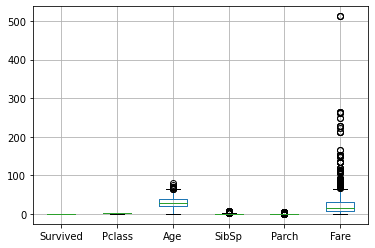

In [7]:
# 6. Do a box plot on the data frame
titanic_data.boxplot()

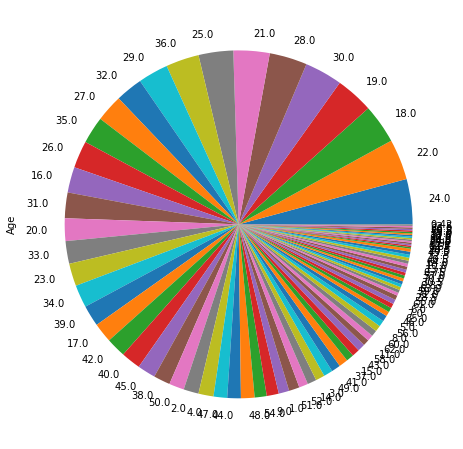

In [8]:
# 7. Create a Pie Graph based on Age
titanic_data['Age'].value_counts().plot(kind='pie', figsize=(8,8))

In [9]:
# 8. Use groupby to group ages to those that survived
titanic_survived_by_age = titanic_data.groupby(['Age'])['Survived'].agg(count='count', sum='sum')

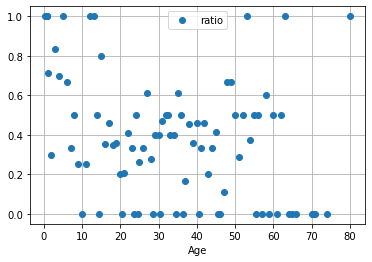

In [10]:
# 9. Calculate the ratio that survived to the to age group
titanic_survived_by_age['ratio'] = titanic_survived_by_age['sum'] / titanic_survived_by_age['count']

titanic_survived_by_age['ratio'].to_frame().plot(style='o', grid=True)